In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


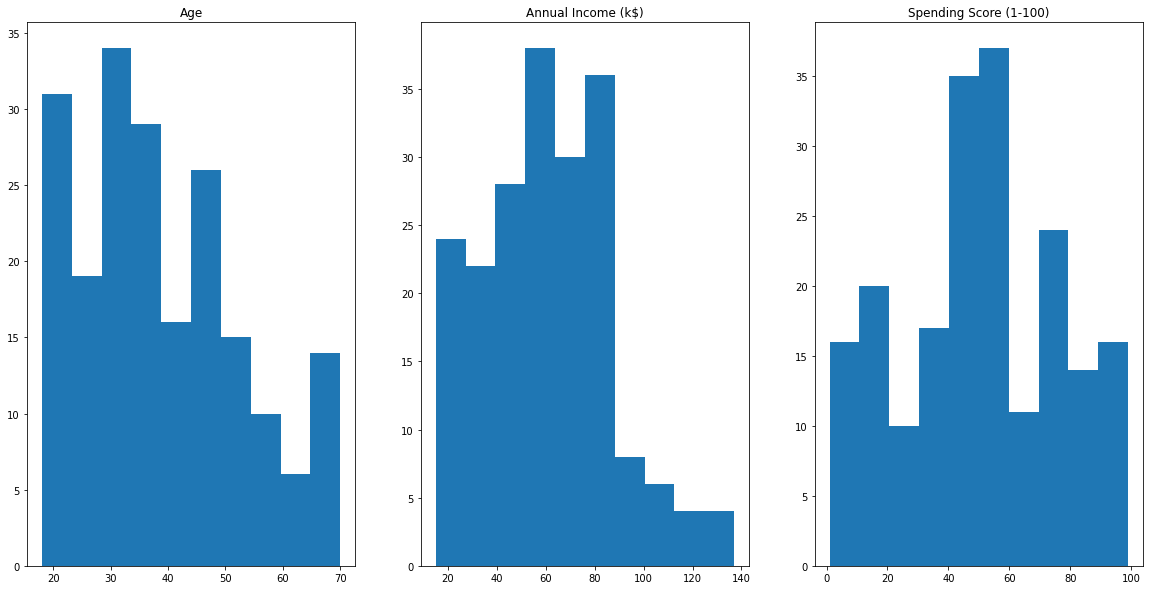

In [3]:
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.hist(df['Age']), plt.title('Age')
plt.subplot(132), plt.hist(df['Annual Income (k$)']), plt.title('Annual Income (k$)')
plt.subplot(133), plt.hist(df['Spending Score (1-100)']), plt.title('Spending Score (1-100)')
plt.show()

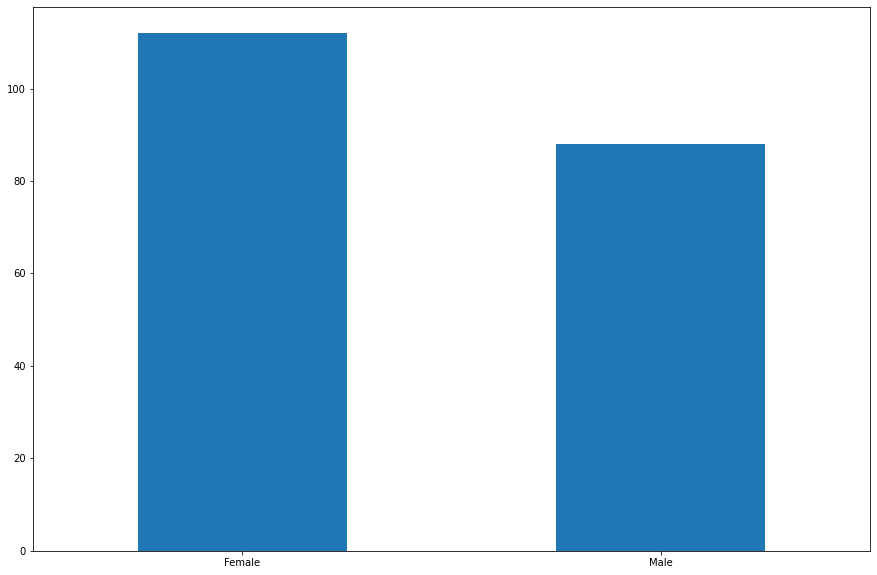

In [4]:
plt.figure(figsize=(15, 10))
df['Gender'].value_counts().plot.bar(rot=0);

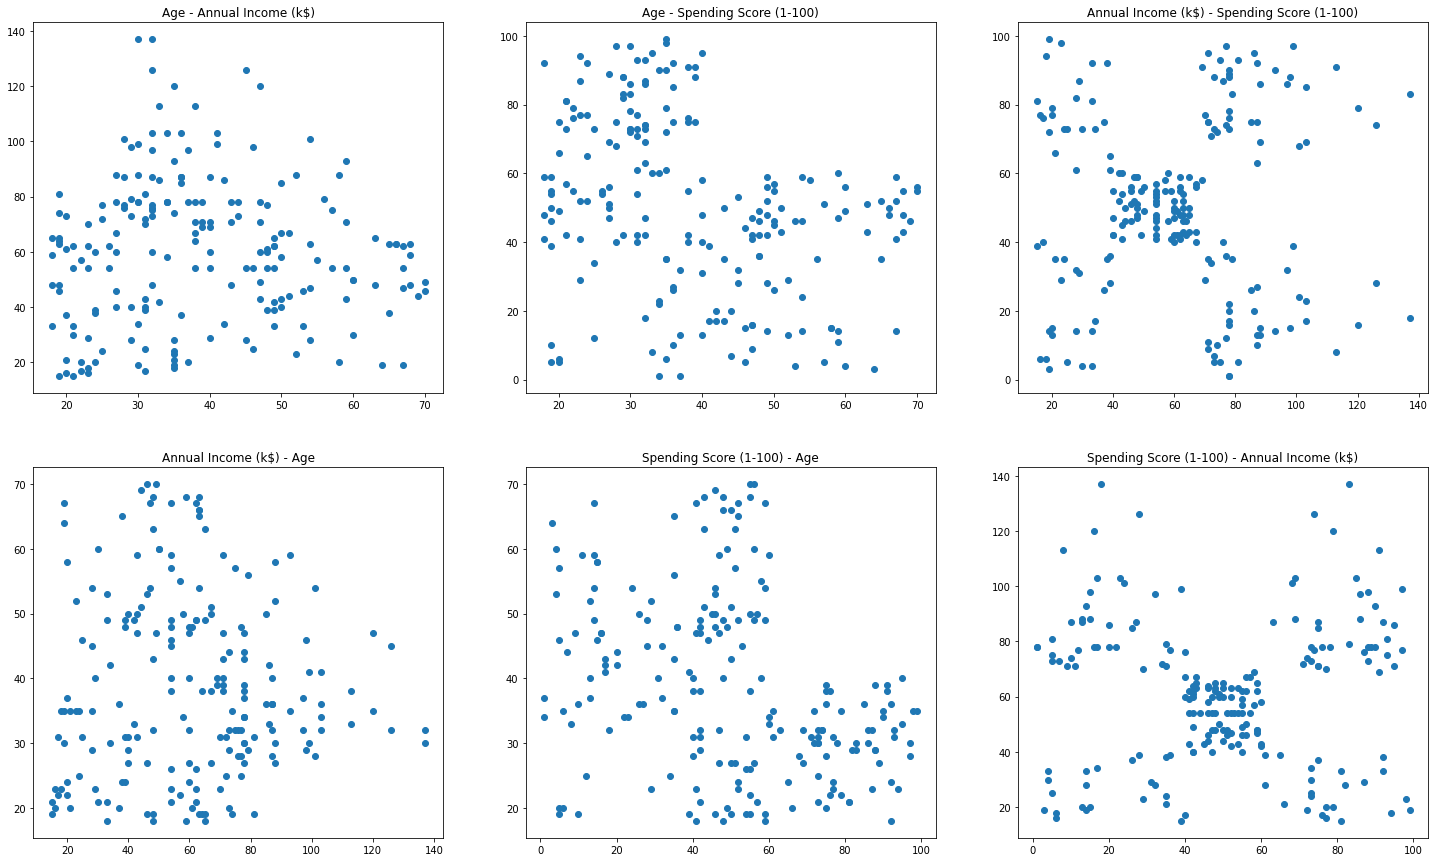

In [5]:
plt.figure(figsize=(25, 15))
plt.subplot(231), plt.scatter(df['Age'], df['Annual Income (k$)']), plt.title('Age - Annual Income (k$)')
plt.subplot(232), plt.scatter(df['Age'], df['Spending Score (1-100)']), plt.title('Age - Spending Score (1-100)')
plt.subplot(233), plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)']), plt.title('Annual Income (k$) - Spending Score (1-100)')
plt.subplot(234), plt.scatter(df['Annual Income (k$)'], df['Age']), plt.title('Annual Income (k$) - Age')
plt.subplot(235), plt.scatter(df['Spending Score (1-100)'], df['Age']), plt.title('Spending Score (1-100) - Age')
plt.subplot(236), plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)']), plt.title('Spending Score (1-100) - Annual Income (k$)')
plt.show()

In [6]:
df = df.drop(columns='CustomerID')

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
print('Covariance matrix')
df.cov()

Covariance matrix


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,0.247638,0.423116,0.737286,-0.746734
Age,0.423116,195.133166,-4.548744,-118.040201
Annual Income (k$),0.737286,-4.548744,689.835578,6.716583
Spending Score (1-100),-0.746734,-118.040201,6.716583,666.854271


In [8]:
print('Correlation matrix')
df.corr()

Correlation matrix


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [9]:
# Kmeans clustering

kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color=y_kmeans).show()

In [10]:
# Kmeans clustering with PCA

df_PCA = StandardScaler().fit_transform(df.drop(columns='Gender'))
df_PCA = pd.DataFrame(data=df_PCA, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_PCA = pd.concat([df['Gender'], df_PCA], axis=1)
df_PCA.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


In [11]:
n = 2
pca = PCA(n)
df_PCA = pca.fit_transform(df_PCA)
df_PCA = pd.DataFrame(data=df_PCA, columns=[f'PC{i + 1}' for i in range(n)])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.4095285 0.3081674]
0.7176959022847653


In [12]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n)]
most_important_names = [list(df)[most_important[i]] for i in range(n)]
dic = {f'PC{i + 1}': most_important_names[i] for i in range(n)}
pd.DataFrame(dic.items())

,0,1
0,PC1,Age
1,PC2,Annual Income (k$)


In [13]:
kmeans_PCA = KMeans(n_clusters=5)
y_kmeans_PCA = kmeans_PCA.fit_predict(df_PCA)

px.scatter(df_PCA, x='PC1', y='PC2', color=y_kmeans_PCA, title=f'Total Explained Variance: {pca.explained_variance_ratio_.sum() * 100:.2f}%').show()